This file contains code for generate SC and dist mats from 68x68 riginal mats


In [1]:
import sys
sys.path.append("../mypkg")

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from numbers import Number
import multiprocessing as mp

from easydict import EasyDict as edict
from tqdm import trange
from scipy.io import loadmat

In [3]:
from constants import DATA_ROOT, RES_ROOT, FIG_ROOT, MIDRES_ROOT
from default_paras import def_paras

from hdf_utils.data_gen_utils import gen_new_sc, get_dist, get_sc
from utils.misc import save_pkl, load_pkl

plt.style.use(FIG_ROOT/"base.mplstyle")

Load file /data/rajlab1/user_data/jin/MyResearch/HDF_infer/notebooks/../mypkg/../data/sc_distmat/sc68_org.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/HDF_infer/notebooks/../mypkg/../data/sc_distmat/dist68_org.pkl


# Generate template sc and dist mat

(only need once)

In [18]:
# save the sc and dist mat
from spectrome import Brain
brain = Brain.Brain()
brain.add_connectome(DATA_ROOT/"sc_distmat")
brain.reorder_connectome(brain.connectome, brain.distance_matrix)
brain.bi_symmetric_c()
brain.reduce_extreme_dir()
sc_org = brain.reducedConnectome
dist_org = brain.distance_matrix;
save_pkl(DATA_ROOT/"sc_distmat/sc68_org.pkl", sc_org[:68, :68])
save_pkl(DATA_ROOT/"sc_distmat/dist68_org.pkl", dist_org[:68, :68])

/data/rajlab1/user_data/jin/MyResearch/HDF_infer/notebooks/../mypkg/../data/sc_distmat/sc68_org.pkl exists! Use is_force=True to save it anyway
/data/rajlab1/user_data/jin/MyResearch/HDF_infer/notebooks/../mypkg/../data/sc_distmat/dist68_org.pkl exists! Use is_force=True to save it anyway


# Load

In [5]:
sc_org = load_pkl(DATA_ROOT/"sc_distmat/sc68_org.pkl");
dist_org = load_pkl(DATA_ROOT/"sc_distmat/dist68_org.pkl");

Load file /data/rajlab1/user_data/jin/MyResearch/HDF_infer/notebooks/../mypkg/../data/sc_distmat/sc68_org.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/HDF_infer/notebooks/../mypkg/../data/sc_distmat/dist68_org.pkl


<AxesSubplot:title={'center':'Distance matrix'}>

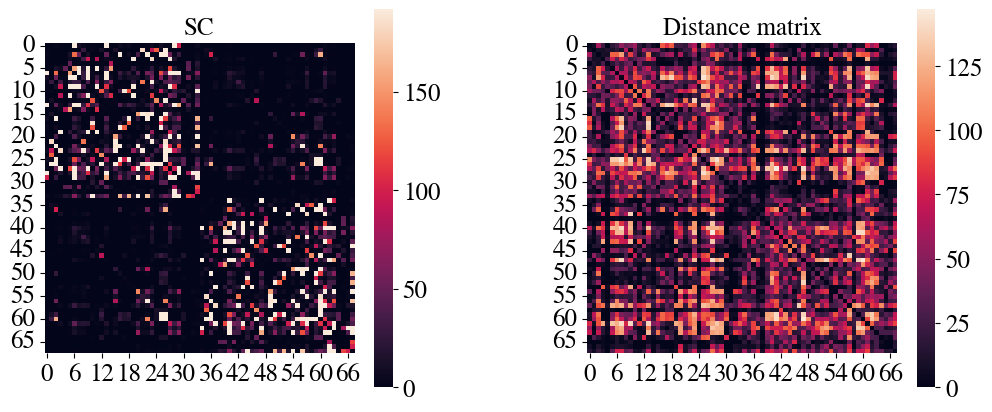

In [29]:
plt.figure(figsize=[12, 5])
plt.subplot(121)
plt.title("SC")
sns.heatmap(sc_org, square=True)
plt.subplot(122)
plt.title("Distance matrix")
sns.heatmap(dist_org, square=True)

# SC generating

<AxesSubplot:>

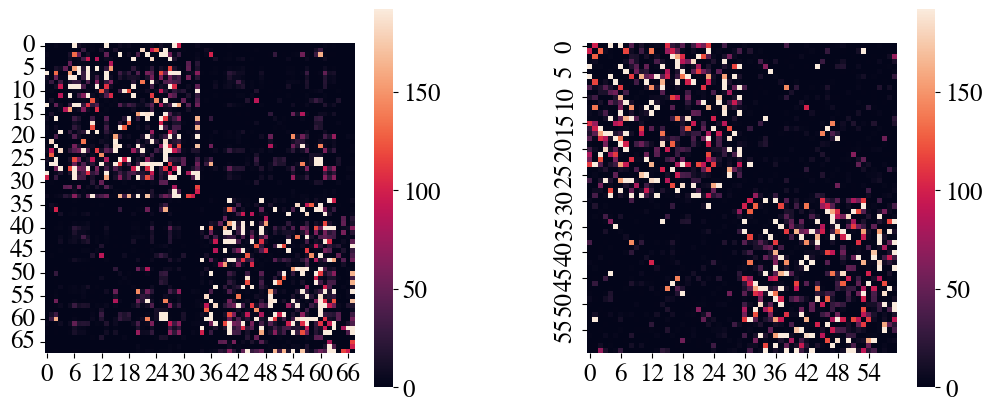

In [7]:
mat = sc_org
new_mat = gen_new_sc(60, mat)
plt.figure(figsize=[12, 5])
plt.subplot(121)
sns.heatmap(mat, square=True)
plt.subplot(122)
sns.heatmap(new_mat, square=True)

<AxesSubplot:>

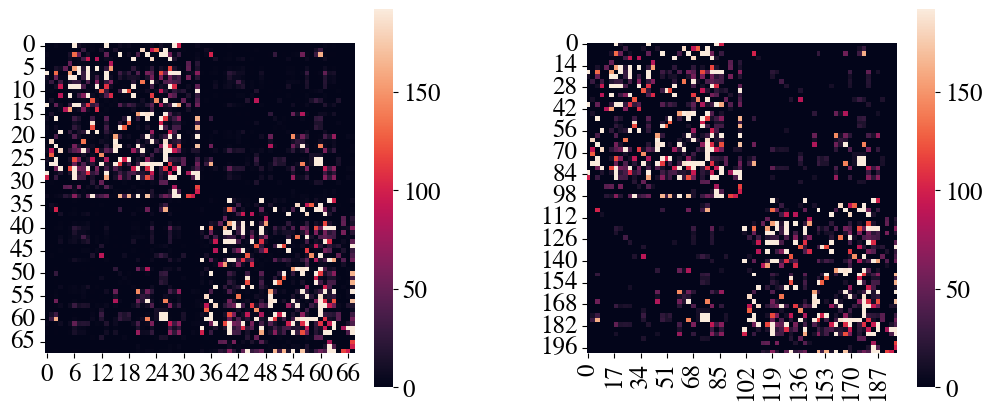

In [8]:
mat = sc_org
new_mat = get_sc(200)
plt.figure(figsize=[12, 5])
plt.subplot(121)
sns.heatmap(mat, square=True)
plt.subplot(122)
sns.heatmap(new_mat, square=True)

# Dist Generating

<AxesSubplot:>

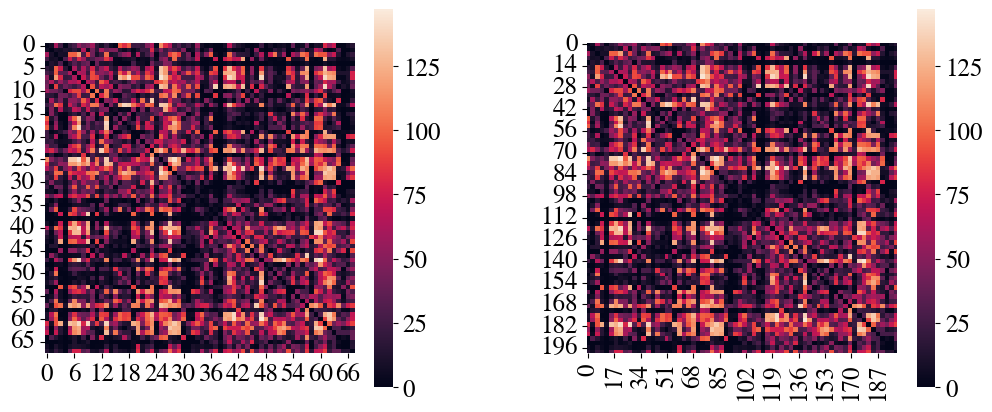

In [9]:
mat = dist_org
new_mat = get_dist(200)
plt.figure(figsize=[12, 5])
plt.subplot(121)
sns.heatmap(mat, square=True)
plt.subplot(122)
sns.heatmap(new_mat, square=True)